Epoch 1/200
125/125 [==============================] - 1s 1ms/step - loss: 2.5467
Epoch 2/200
125/125 [==============================] - 0s 2ms/step - loss: 2.3876
Epoch 3/200
125/125 [==============================] - 0s 1ms/step - loss: 2.2623
Epoch 4/200
125/125 [==============================] - 0s 2ms/step - loss: 2.1260
Epoch 5/200
125/125 [==============================] - 0s 2ms/step - loss: 1.9842
Epoch 6/200
125/125 [==============================] - 0s 2ms/step - loss: 1.8512
Epoch 7/200
125/125 [==============================] - 0s 1ms/step - loss: 1.7366
Epoch 8/200
125/125 [==============================] - 0s 2ms/step - loss: 1.6444
Epoch 9/200
125/125 [==============================] - 0s 1ms/step - loss: 1.5666
Epoch 10/200
125/125 [==============================] - 0s 1ms/step - loss: 1.4827
Epoch 11/200
125/125 [==============================] - 0s 1ms/step - loss: 1.3773
Epoch 12/200
125/125 [==============================] - 0s 2ms/step - loss: 1.2828
Epoch 13/200


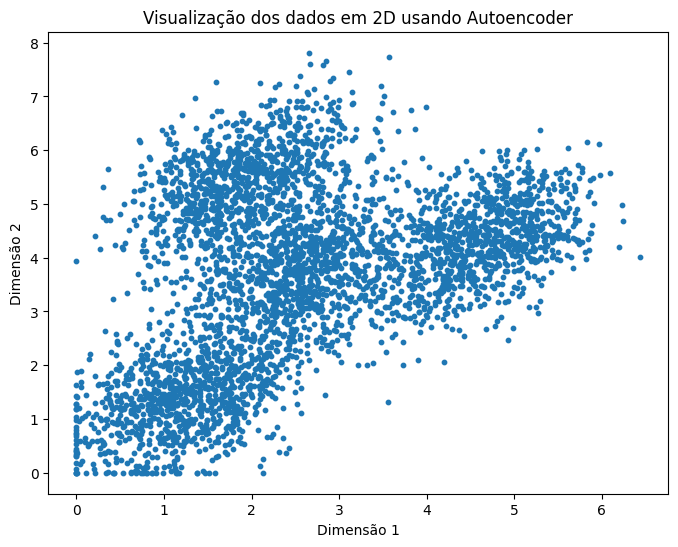

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Definindo os parâmetros
input_dim = 8
encoding_dim = 2

# Definindo as médias dos centros das distribuições gaussianas
means = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [4, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 4, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 4]])

# Criando os dados de entrada
num_samples_per_class = 1000
data = []
for mean in means:
    data.append(np.random.normal(mean, 1, size=(num_samples_per_class, input_dim)))
data = np.vstack(data)

# Definindo a arquitetura do autoencoder
input_data = tf.keras.layers.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_data)
decoded = tf.keras.layers.Dense(input_dim, activation='linear')(encoded)

# Criando o modelo do autoencoder
autoencoder = tf.keras.models.Model(input_data, decoded)

# Compilando o modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Treinando o autoencoder
autoencoder.fit(data, data, epochs=200, batch_size=32)

# Obtendo as representações de baixa dimensão dos dados de entrada
encoder = tf.keras.models.Model(input_data, encoded)
encoded_data = encoder.predict(data)

# Plotando os dados no espaço de duas dimensões
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], s=10)
plt.title('Visualização dos dados em 2D usando Autoencoder')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.show()
